In [277]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from sklearn.decomposition import PCA
import config
from config import CONNSTRING
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

In [260]:
engine= create_engine(CONNSTRING)

query = "SELECT * FROM customer_data"
df = pd.read_sql(query, engine)

In [261]:
#Clustering Customers
#Step 1: Data Preprocessing
# Converting columns to appropriate data types
df['Customer ID'] = df['Customer ID'].astype(int)  # Assuming 'Customer ID' is an integer
df['age'] = df['age'].astype(int)  # Age is an integer
df['gender'] = df['gender'].astype('category')  # Gender as category
df['Item Purchased'] = df['Item Purchased'].astype('category')  # Item Purchased as category
df['category'] = df['category'].astype('category')  # Category as category
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)  # Purchase Amount as float
df['location'] = df['location'].astype('category')  # Location as category
df['size'] = df['size'].astype('category')  # Size as category
df['color'] = df['color'].astype('category')  # Color as category
df['season'] = df['season'].astype('category')  # Season as category
df['Review Rating'] = df['Review Rating'].astype(float)  # Review Rating as float
df['Subscription Status'] = df['Subscription Status'].astype('category')  # Subscription Status as category
df['Shipping Type'] = df['Shipping Type'].astype('category')  # Shipping Type as category
df['Discount Applied'] = df['Discount Applied'].astype('category')  # Discount Applied as category (assuming 'Yes'/'No')
df['Promo Code Used'] = df['Promo Code Used'].astype('category')  # Promo Code Used as category
df['Previous Purchases'] = df['Previous Purchases'].astype(int)  # Previous Purchases as integer
df['Payment Method'] = df['Payment Method'].astype('category')  # Payment Method as category
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category')  # Frequency of Purchases as category

In [262]:
# Select relevant features
features_categorical = df[['gender', 'category', 'location', 'Payment Method']].copy()
features_numerical = df[['age', 'Previous Purchases','Purchase Amount (USD)']].copy()


features_encoded = pd.get_dummies(features_categorical)
features_encoded.head() 

# Concatenate numerical and encoded features
features = pd.concat([features_numerical, features_encoded], axis=1)
features.head()

,age,Previous Purchases,Purchase Amount (USD),gender_Female,gender_Male,category_Accessories,category_Clothing,category_Footwear,category_Outerwear,location_Alabama,...,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,55,14,53.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,19,2,64.0,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,50,23,73.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,21,49,90.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,45,31,49.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [263]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

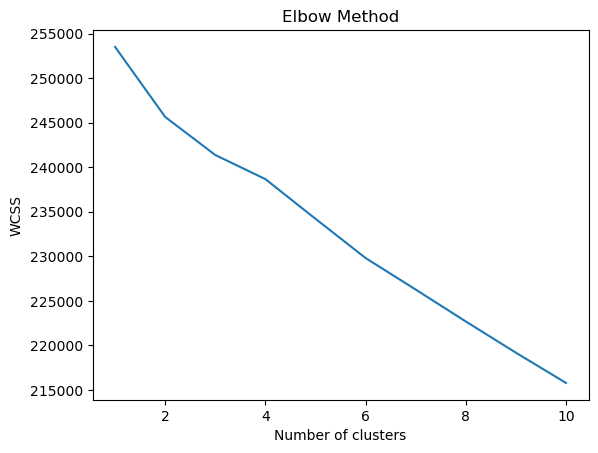

In [264]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### It was selected a number of three clusters according to the Elbow Method performed.

In [265]:
# Create a clustering model (example: K-Means)
kmeans = KMeans(n_clusters=3)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(features_scaled)

c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\825195500.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.savefig('Customers_Clusters\cluster_visualization.jpeg', format='jpeg', dpi=300)


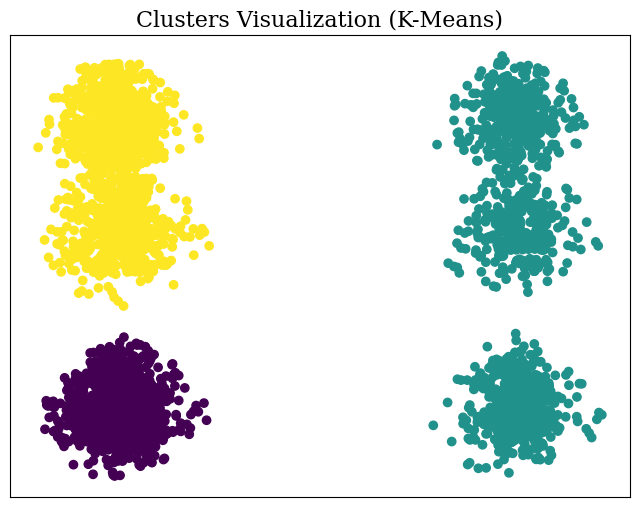

In [271]:
# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

# Create the scatter plot with customizations
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')

# Set a professional font for the title
plt.title('Clusters Visualization (K-Means)', fontfamily='serif', fontsize=16)  # Adjust fontsize if needed

# Remove axis labels and ticks
plt.xticks([])
plt.yticks([])

# Save the plot as a JPEG image
plt.savefig('Customers_Clusters\cluster_visualization.jpeg', format='jpeg', dpi=300)

### According to the resulting visualization, we can see that Cluster 1 could be subdivided into two clusters, in order to have a better delimitation of consumer patterns.

This indicates that the customer base can be divided into four main segments. The clusters are well-separated, suggesting that segmentation is meaningful and the algorithm has effectively captured underlying patterns in the data.

Cluster Shapes: The shape and density of each cluster can provide additional information about the customer segments. For example, a circular cluster might indicate customers with similar characteristics, while an elongated cluster could suggest a gradient in certain features.



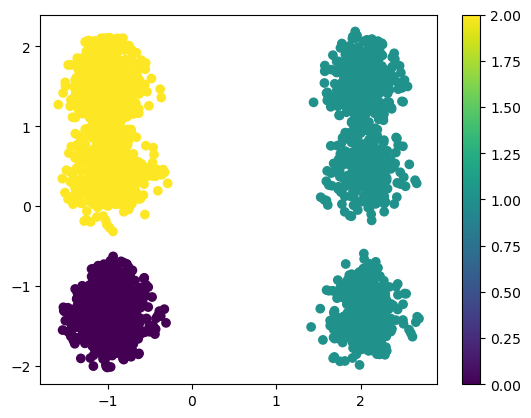

In [280]:
cluster_labels = df['cluster']  # Assuming 'cluster' is the column name
# Plot the clusters to identify Number of Cluster
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar()
plt.show()

In [281]:
# Filter data for Cluster 1
cluster_1_data = df[df['cluster'] == 1]

# Select relevant features
features_categorical_c1 = cluster_1_data[['gender', 'category', 'location', 'Payment Method']].copy()
features_numerical_c1 = cluster_1_data[['age', 'Previous Purchases','Purchase Amount (USD)']].copy()


features_encoded_c1 = pd.get_dummies(features_categorical_c1)
features_encoded_c1.head() 

# Concatenate numerical and encoded features
featuresc1 = pd.concat([features_numerical_c1, features_encoded_c1], axis=1)

# Standardize the features
scaler = StandardScaler()
cluster_1_data_scaled = scaler.fit_transform(featuresc1)


# Apply K-Means to Cluster 1 data
sub_kmeans = KMeans(n_clusters=2) # Adjust the number of sub-clusters as needed
sub_clusters = sub_kmeans.fit_predict(cluster_1_data_scaled)

# Create a new DataFrame for sub-clustered data
sub_cluster_df = cluster_1_data.copy()
sub_cluster_df['sub_cluster'] = sub_clusters

# Combine sub-clustered data with the rest of the data
df_with_subclusters = pd.concat([df[df['cluster'] != 1], sub_cluster_df], ignore_index=True)




c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [282]:
df_with_subclusters

,Customer ID,age,gender,Item Purchased,category,Purchase Amount (USD),location,size,color,season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster,sub_cluster
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,NaN
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,NaN
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,NaN
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,2,NaN
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28.0,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,1,0.0
3896,3897,52,Female,Backpack,Accessories,49.0,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,1,1.0
3897,3898,46,Female,Belt,Accessories,33.0,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,1,1.0
3898,3899,44,Female,Shoes,Footwear,77.0,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,1,1.0


In [283]:
# Modify the 'cluster' column based on conditions
df_with_subclusters.loc[(df_with_subclusters['cluster'] == 1) & (df_with_subclusters['sub_cluster'] == 0), 'cluster'] = 3

# Display the modified DataFrame
df_with_subclusters

,Customer ID,age,gender,Item Purchased,category,Purchase Amount (USD),location,size,color,season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster,sub_cluster
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,NaN
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,NaN
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,NaN
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,2,NaN
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28.0,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,3,0.0
3896,3897,52,Female,Backpack,Accessories,49.0,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,1,1.0
3897,3898,46,Female,Belt,Accessories,33.0,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,1,1.0
3898,3899,44,Female,Shoes,Footwear,77.0,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,1,1.0


In [284]:
# Drop the 'sub_cluster' column
df_with_subclusters.drop('sub_cluster', axis=1, inplace=True)

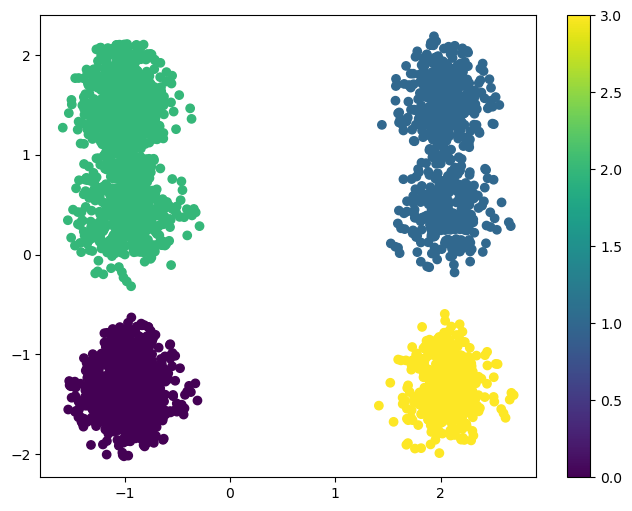

In [296]:

cluster_labels = df_with_subclusters['cluster']  # Assuming 'cluster' is the column name

# Define image size (width, height in inches)
plt.figure(figsize=(8, 6))

# Plot the clusters to identify Number of Cluster
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar()
plt.show()


To understand the relationship between features and customer segments, further analysis is suggested:

Calculate Cluster Means: Compute the mean value of each feature for each cluster. This will give you a general idea of the characteristics of customers in each segment.

Feature Importance: Use techniques like feature importance from decision trees or random forests to identify the features that contribute most to the clustering.

Domain Knowledge: Leverage your understanding of the business and customer data to interpret the cluster characteristics.

### Unveiling insightful patterns within the e-commerce sales dataset:

One of the foundational steps was the development of a customer segmentation model using the k-means clustering method. This approach allowed us to categorize customers into distinct groups based on their purchasing behaviors and demographic characteristics.

After sub-clustering, we selected four clusters, which struck a balance between granularity and interpretability. To visualize the clusters, we employed Principal Component Analysis (PCA), a dimensionality reduction technique that projects the data into a two-dimensional space.

This clear separation underscores the efficacy of our clustering approach and sets the stage for a deeper analysis of each segment's unique characteristics and behaviors.

Through this customer segmentation analysis, we aim to provide actionable insights that can inform targeted marketing strategies, enhance customer engagement, and ultimately drive sales growth.

In [215]:

numerical_features = ['age', 'Previous Purchases', 'Purchase Amount (USD)'] 
categorical_features=['gender', 'category', 'location', 'Payment Method']
# Calculate descriptive statistics for numerical features
cluster_stats = df_with_subclusters.groupby('cluster')[numerical_features].describe()

# Calculate mode for categorical features
cluster_modes = df_with_subclusters.groupby('cluster')[categorical_features].agg(lambda x: x.value_counts().index[0])

# Combine descriptive statistics and modes
cluster_profiles = pd.concat([cluster_stats, cluster_modes], axis=1)



In [216]:
# Count occurrences of each cluster value
cluster_counts = df_with_subclusters['cluster'].value_counts()

cluster_counts

cluster
2    1471
0    1181
3     692
1     556
Name: count, dtype: int64

In [217]:
cluster_stats

age                                                      \
          count       mean        std   min   25%   50%   75%   max   
cluster                                                               
0        1181.0  43.859441  15.647620  18.0  30.0  43.0  58.0  70.0   
1         556.0  43.620504  14.747419  18.0  31.0  44.0  56.0  70.0   
2        1471.0  44.288239  15.069584  18.0  31.0  44.0  57.0  70.0   
3         692.0  44.317919  15.121125  18.0  31.0  45.0  57.0  70.0   

        Previous Purchases             ...             Purchase Amount (USD)  \
                     count       mean  ...   75%   max                 count   
cluster                                ...                                     
0                   1181.0  25.412362  ...  37.0  50.0                1181.0   
1                    556.0  24.746403  ...  37.0  50.0                 556.0   
2                   1471.0  25.943576  ...  38.5  50.0                1471.0   
3                    692.0  24.475434  ...  38.0  50.0                 692.0   

                                                              
              mean        std   min   25%   50%   75%    max  
cluster                                                       
0        59.803556  23.987398  20.0  38.0  60.0  81.0  100.0  
1        60.496403  23.387415  20.0  41.0  60.0  81.0  100.0  
2        59.321550  23.672552  20.0  38.5  59.0  80.0  100.0  
3        60.050578  23.462173  20.0  39.0  60.0  81.0  100.0  

[4 rows x 24 columns]

In [219]:
# Exporting to Excel
cluster_stats.to_excel('cluster_stats.xlsx', index=True)

In [220]:
cluster_modes

,gender,category,location,Payment Method
cluster,,,,
0,Male,Clothing,Louisiana,Cash
1,Female,Clothing,Montana,Credit Card
2,Male,Accessories,New Mexico,PayPal
3,Female,Accessories,Texas,PayPal


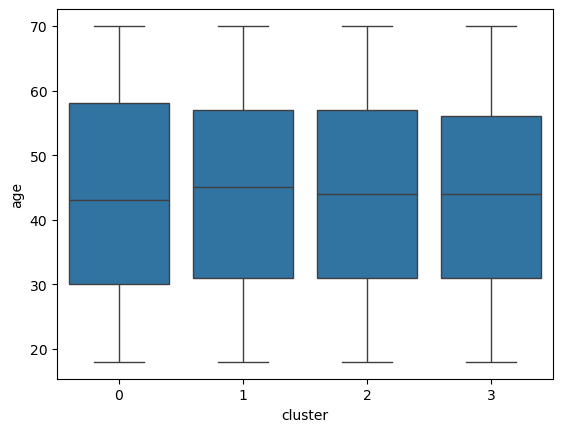

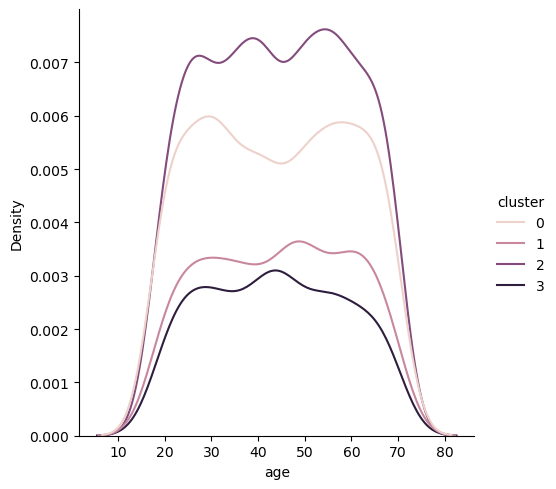

<Figure size 640x480 with 0 Axes>

In [291]:
# Box plots
sns.boxplot(x='cluster', y='age', data=df_with_subclusters)
plt.show()

sns.displot(data=df_with_subclusters, x='age', hue='cluster', kind='kde')
plt.show()



In [222]:
# Create separate DataFrames for each cluster
df_with_subclusters_clustercategory_0 = df_with_subclusters[df_with_subclusters['cluster'] == 0]
df_with_subclusters_clustercategory_1 = df_with_subclusters[df_with_subclusters['cluster'] == 1]
df_with_subclusters_clustercategory_2 = df_with_subclusters[df_with_subclusters['cluster'] == 2]
df_with_subclusters_clustercategory_3 = df_with_subclusters[df_with_subclusters['cluster'] == 3]


In [223]:
category_counts = df_with_subclusters_clustercategory_0 ['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Clothing      1181
Accessories      0
Footwear         0
Outerwear        0


In [225]:

category_counts = df_with_subclusters_clustercategory_1 ['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Clothing       556
Accessories      0
Footwear         0
Outerwear        0


In [226]:

category_counts = df_with_subclusters_clustercategory_2 ['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Accessories    848
Footwear       400
Outerwear      223
Clothing         0


In [227]:

category_counts = df_with_subclusters_clustercategory_3 ['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Accessories    392
Footwear       199
Outerwear      101
Clothing         0


In [228]:
items_counts = df_with_subclusters_clustercategory_0['Item Purchased'].value_counts()

# Convert to DataFrame for potential further operations
item_counts_df = items_counts.to_frame(name='count')

print(item_counts_df)

                count
Item Purchased       
Pants             123
Sweater           114
Dress             114
Shirt             110
Skirt             109
Shorts            109
Blouse            105
T-shirt           101
Socks             101
Hoodie            100
Jeans              95
Scarf               0
Sunglasses          0
Sneakers            0
Shoes               0
Backpack            0
Sandals             0
Belt                0
Jacket              0
Hat                 0
Handbag             0
Gloves              0
Coat                0
Boots               0
Jewelry             0


In [229]:
items_counts = df_with_subclusters_clustercategory_1['Item Purchased'].value_counts()

# Convert to DataFrame for potential further operations
item_counts_df = items_counts.to_frame(name='count')

print(item_counts_df)

                count
Item Purchased       
Blouse             66
Shirt              59
Socks              58
Dress              52
Hoodie             51
Sweater            50
Skirt              49
Shorts             48
Pants              48
T-shirt            46
Jeans              29
Scarf               0
Sunglasses          0
Sneakers            0
Shoes               0
Backpack            0
Sandals             0
Belt                0
Jacket              0
Hat                 0
Handbag             0
Gloves              0
Coat                0
Boots               0
Jewelry             0


In [230]:
items_counts = df_with_subclusters_clustercategory_2['Item Purchased'].value_counts()

# Convert to DataFrame for potential further operations
item_counts_df = items_counts.to_frame(name='count')

print(item_counts_df)

                count
Item Purchased       
Jewelry           119
Coat              114
Scarf             112
Jacket            109
Belt              106
Backpack          106
Sunglasses        105
Gloves            103
Sneakers          103
Hat               102
Shoes             102
Sandals           101
Handbag            95
Boots              94
Shorts              0
Sweater             0
Socks               0
Skirt               0
Blouse              0
Shirt               0
Pants               0
Jeans               0
Dress               0
Hoodie              0
T-shirt             0


In [231]:
items_counts = df_with_subclusters_clustercategory_3['Item Purchased'].value_counts()

# Convert to DataFrame for potential further operations
item_counts_df = items_counts.to_frame(name='count')

print(item_counts_df)

                count
Item Purchased       
Sandals            59
Handbag            58
Sunglasses         56
Belt               55
Jacket             54
Jewelry            52
Hat                52
Boots              50
Shoes              48
Coat               47
Scarf              45
Sneakers           42
Backpack           37
Gloves             37
Pants               0
Jeans               0
Hoodie              0
Shirt               0
Shorts              0
Skirt               0
Dress               0
Socks               0
Blouse              0
Sweater             0
T-shirt             0


In [167]:
season_counts = df_with_subclusters_clustercategory_0['season'].value_counts()

# Convert to DataFrame for potential further operations
season_counts_df = season_counts.to_frame(name='count')

print(season_counts_df)

        count
season       
Spring    318
Winter    306
Summer    282
Fall      275


In [168]:
season_counts = df_with_subclusters_clustercategory_1['season'].value_counts()

# Convert to DataFrame for potential further operations
season_counts_df = season_counts.to_frame(name='count')

print(season_counts_df)

        count
season       
Fall      328
Spring    316
Winter    306
Summer    298


In [169]:
season_counts = df_with_subclusters_clustercategory_2['season'].value_counts()

# Convert to DataFrame for potential further operations
season_counts_df = season_counts.to_frame(name='count')

print(season_counts_df)

        count
season       
Summer    375
Fall      372
Spring    365
Winter    359


In [232]:
season_counts = df_with_subclusters_clustercategory_3['season'].value_counts()

# Convert to DataFrame for potential further operations
season_counts_df = season_counts.to_frame(name='count')

print(season_counts_df)

        count
season       
Spring    180
Fall      176
Summer    172
Winter    164


In [233]:
color_counts = df_with_subclusters_clustercategory_0['color'].value_counts()

# Convert to DataFrame for potential further operations
color_counts_df = color_counts.to_frame(name='count')

print(color_counts_df)

           count
color           
Teal          57
Green         57
Violet        56
Maroon        55
Silver        54
Cyan          53
Purple        50
Orange        50
Charcoal      49
Black         48
Peach         48
Beige         48
Brown         48
Yellow        48
Turquoise     47
Gray          46
Red           46
White         45
Lavender      44
Pink          44
Indigo        42
Gold          42
Olive         35
Blue          35
Magenta       34


In [234]:
color_counts = df_with_subclusters_clustercategory_1['color'].value_counts()

# Convert to DataFrame for potential further operations
color_counts_df = color_counts.to_frame(name='count')

print(color_counts_df)

           count
color           
Black         33
Pink          29
Maroon        28
Orange        28
Teal          27
Yellow        27
Olive         26
Silver        26
Magenta       25
White         24
Charcoal      24
Violet        23
Cyan          23
Red           22
Purple        22
Green         21
Gold          20
Turquoise     18
Peach         17
Indigo        17
Beige         17
Gray          16
Lavender      16
Blue          14
Brown         13


In [235]:
color_counts = df_with_subclusters_clustercategory_2['color'].value_counts()

# Convert to DataFrame for potential further operations
color_counts_df = color_counts.to_frame(name='count')

print(color_counts_df)

           count
color           
Olive         83
Silver        67
Yellow        66
Cyan          66
Blue          65
Black         65
Teal          62
Magenta       61
Gray          60
Indigo        60
Purple        59
Beige         59
Red           58
Turquoise     58
Violet        57
Green         56
Lavender      55
Gold          55
Charcoal      54
Orange        53
Peach         53
White         52
Pink          51
Maroon        49
Brown         47


In [236]:
color_counts = df_with_subclusters_clustercategory_3['color'].value_counts()

# Convert to DataFrame for potential further operations
color_counts_df = color_counts.to_frame(name='count')

print(color_counts_df)

           count
color           
Blue          38
Gray          37
Green         35
Yellow        33
Brown         33
Olive         33
Lavender      32
Magenta       32
Peach         31
Violet        30
Pink          29
Indigo        28
Teal          26
Silver        26
Maroon        26
Charcoal      26
Cyan          24
Orange        23
Beige         23
Red           22
Turquoise     22
Black         21
Gold          21
White         21
Purple        20


In [244]:
# Analyze location distribution within clusters.

def analyze_location_distribution(df_with_subclusters, cluster, location):

  location_counts = df_with_subclusters.groupby([cluster, location]).size().reset_index(name='count')
  location_counts = location_counts.sort_values(['cluster', 'count'], ascending=False)
  return location_counts

# Example usage:
location_distribution = analyze_location_distribution(df_with_subclusters, 'cluster', 'location')
location_distribution

C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\3287737612.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_counts = df_with_subclusters.groupby([cluster, location]).size().reset_index(name='count')


,cluster,location,count
192,3,Texas,24
166,3,Kentucky,20
165,3,Kansas,19
175,3,Montana,18
150,3,Alabama,17
...,...,...,...
2,0,Arizona,18
26,0,Nebraska,18
34,0,Ohio,18
29,0,New Jersey,17


C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\1782300792.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(top_5_locations['location'], rotation=45, ha='right')
C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\1782300792.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(top_5_locations['location'], rotation=45, ha='right')
C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\1782300792.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(top_5_locations['location'], rotation=45, ha='right')
C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\1782300792.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

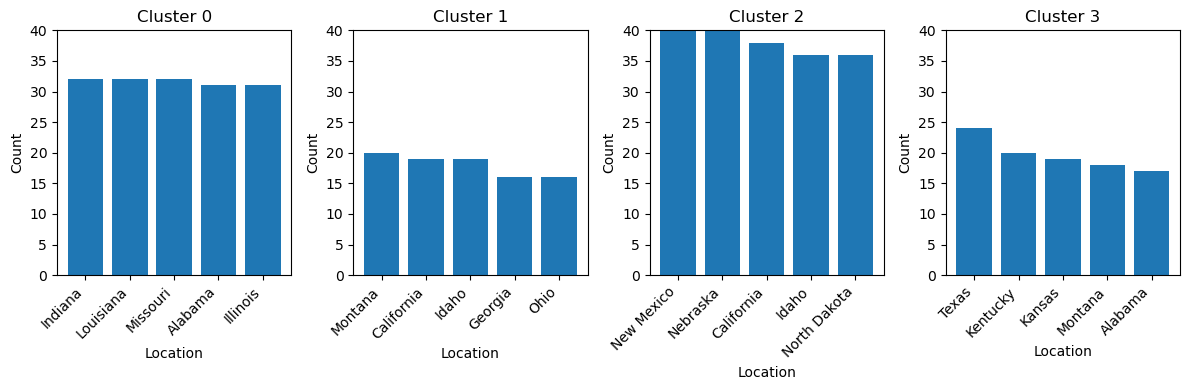

In [249]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Create a figure with 4 subplots

# Sort clusters in ascending order
clusters = location_distribution['cluster'].unique()
clusters.sort()

for i, cluster in enumerate(clusters):
    cluster_data = location_distribution[location_distribution['cluster'] == cluster]
    top_5_locations = cluster_data.nlargest(5, 'count')

    axes[i].bar(top_5_locations['location'], top_5_locations['count'])
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xlabel("Location")
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(top_5_locations['location'], rotation=45, ha='right')
    axes[i].set_ylim(0, 40)

plt.tight_layout()
plt.show()

In [250]:
# Count occurrences of gender within each cluster
gender_counts = df_with_subclusters.groupby(['cluster', 'gender']).size().reset_index(name='count')

# Pivot the data for a clearer view
gender_counts_pivot = gender_counts.pivot_table(index='cluster', columns='gender', values='count', fill_value=0)

gender_counts_pivot

C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\2296132046.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df_with_subclusters.groupby(['cluster', 'gender']).size().reset_index(name='count')
C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\2296132046.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gender_counts_pivot = gender_counts.pivot_table(index='cluster', columns='gender', values='count', fill_value=0)


gender,Female,Male
cluster,,
0,0.0,1181.0
1,556.0,0.0
2,0.0,1471.0
3,692.0,0.0


C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\4139576189.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df_with_subclusters.groupby([cluster, gender]).size().unstack()


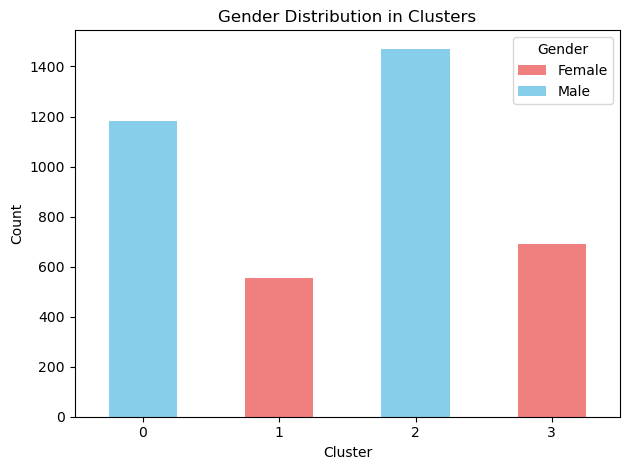

In [251]:
#Plots the distribution of gender within each cluster.

def plot_gender_distribution(df_with_subclusters, cluster, gender):


  gender_counts = df_with_subclusters.groupby([cluster, gender]).size().unstack()
  gender_counts.plot(kind='bar', stacked=True, color=['lightcoral','skyblue'])
  plt.xlabel("Cluster")
  plt.ylabel("Count")
  plt.title("Gender Distribution in Clusters")
  plt.legend(title="Gender")
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

# Plot gender distribution
plot_gender_distribution(df_with_subclusters.copy(), 'cluster', 'gender')

In [253]:
# Group by cluster and count payment methods
grouped = df_with_subclusters.groupby(['cluster', 'Payment Method']).size().reset_index(name='count')

# Create separate DataFrames for each cluster
cluster_dfs = {}
for cluster, group in grouped.groupby('cluster'):
    cluster_dfs[cluster] = group.sort_values('count', ascending=False)

# Access individual DataFrames
df_cluster_0 = cluster_dfs[0]
df_cluster_1 = cluster_dfs[1]
df_cluster_2 = cluster_dfs[2]
df_cluster_3 = cluster_dfs[3]

print(df_cluster_0)
print(df_cluster_1)
print(df_cluster_2)
print(df_cluster_3)

   cluster Payment Method  count
1        0           Cash    208
2        0    Credit Card    207
3        0     Debit Card    201
0        0  Bank Transfer    193
4        0         PayPal    192
5        0          Venmo    180
    cluster Payment Method  count
8         1    Credit Card     99
7         1           Cash     93
6         1  Bank Transfer     92
9         1     Debit Card     92
10        1         PayPal     90
11        1          Venmo     90
    cluster Payment Method  count
16        2         PayPal    264
15        2     Debit Card    254
13        2           Cash    250
17        2          Venmo    246
14        2    Credit Card    241
12        2  Bank Transfer    216
    cluster Payment Method  count
22        3         PayPal    131
20        3    Credit Card    124
19        3           Cash    119
23        3          Venmo    118
18        3  Bank Transfer    111
21        3     Debit Card     89


C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\3671834690.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_with_subclusters.groupby(['cluster', 'Payment Method']).size().reset_index(name='count')


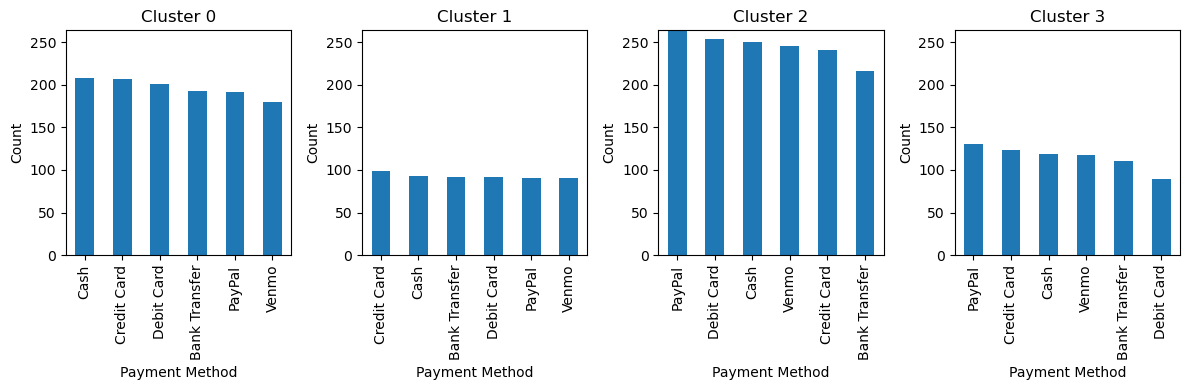

In [301]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Set y-axis limits for all plots
y_max = max(df_cluster_0['count'].max(), df_cluster_1['count'].max(), df_cluster_2['count'].max())


# Plot for Cluster 0
df_cluster_0.plot(kind='bar', x='Payment Method', y='count', ax=axes[0], legend=False, ylim=(0, y_max))
axes[0].set_title('Cluster 0')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Count')

# Plot for Cluster 1
df_cluster_1.plot(kind='bar', x='Payment Method', y='count', ax=axes[1], legend=False, ylim=(0, y_max))
axes[1].set_title('Cluster 1')
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Count')

# Plot for Cluster 2
df_cluster_2.plot(kind='bar', x='Payment Method', y='count', ax=axes[2], legend=False, ylim=(0, y_max))
axes[2].set_title('Cluster 2')
axes[2].set_xlabel('Payment Method')
axes[2].set_ylabel('Count')

# Plot for Cluster 3
df_cluster_3.plot(kind='bar', x='Payment Method', y='count', ax=axes[3], legend=False, ylim=(0, y_max))
axes[3].set_title('Cluster 3')
axes[3].set_xlabel('Payment Method')
axes[3].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Predictive Machine Learning Model: Random Forest Classifier: Customer Spending Prediction Model

This model is aimed at predicting whether a customer will spend more than $85. The model leverages key customer attributes including age, gender, location, high-spending category, previous purchases, and purchase frequency to make accurate predictions.

By analyzing these factors, the model aims to identify patterns and trends that influence customer spending behavior. The developed model achieved an accuracy of 0.8, demonstrating its effectiveness in classifying customers that are high-spending.


In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'df' with columns 'cluster', 'Purchase Amount (USD)'

# Define the target variable (e.g., using median as threshold)
median_purchase_amount = df['Purchase Amount (USD)'].median()
df['spending_category'] = df['Purchase Amount (USD)'].apply(lambda x: 'low' if x <= median_purchase_amount else 'high')



high_purchase_amount = 85
df['high_spending_category'] = df['Purchase Amount (USD)'].apply(lambda x: 'No' if x <= high_purchase_amount else 'Yes')

In [158]:

customer_segmentation1 = df[['age', 'gender', 'location', 'high_spending_category', 'Previous Purchases', 'Frequency of Purchases']].copy()

customer_segmentation_encoded1 = pd.get_dummies(customer_segmentation1, columns=['location', 'gender', 'Frequency of Purchases'])
customer_segmentation_encoded1.head()


,age,high_spending_category,Previous Purchases,location_Alabama,location_Alaska,location_Arizona,location_Arkansas,location_California,location_Colorado,location_Connecticut,...,location_Wyoming,gender_Female,gender_Male,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,No,14,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,19,No,2,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,50,No,23,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,21,Yes,49,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,45,No,31,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False


In [159]:
customer_segmentation_encoded1.drop('gender_Female', axis=1)

,age,high_spending_category,Previous Purchases,location_Alabama,location_Alaska,location_Arizona,location_Arkansas,location_California,location_Colorado,location_Connecticut,...,location_Wisconsin,location_Wyoming,gender_Male,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,No,14,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,19,No,2,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,50,No,23,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,21,Yes,49,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,45,No,31,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,No,32,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3896,52,No,41,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3897,46,No,24,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3898,44,No,24,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [160]:
# Separate features and target variable
X = customer_segmentation_encoded1.drop('high_spending_category', axis=1)
y = customer_segmentation_encoded1['high_spending_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the   model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


In [161]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[620  17]
 [139   4]]
              precision    recall  f1-score   support

          No       0.82      0.97      0.89       637
         Yes       0.19      0.03      0.05       143

    accuracy                           0.80       780
   macro avg       0.50      0.50      0.47       780
weighted avg       0.70      0.80      0.73       780



#### Utilizing a Random Forest Classifier model, we achieved an 80% accuracy rate in predicting whether a customer's purchase amount will exceed $85, classifying them into a very high spending category. This finding is highly relevant as it demonstrates the capability of machine learning to identify potential high-value customers. By leveraging these insights, businesses can tailor their marketing strategies, optimize inventory management, and enhance customer engagement efforts, ultimately driving sales growth and improving customer satisfaction.